<a href="https://colab.research.google.com/github/7aslan/TensrFlow_Practice/blob/main/02_neural_network_classification_in_tensorlfow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with Tensorflow
In this notebook we re gonna learn how to code neaural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 100 examples
n_samples = 1000

# Create circcles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [ ]:
# Check out features:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard tı understand right now... Lets visualize it


In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles


,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


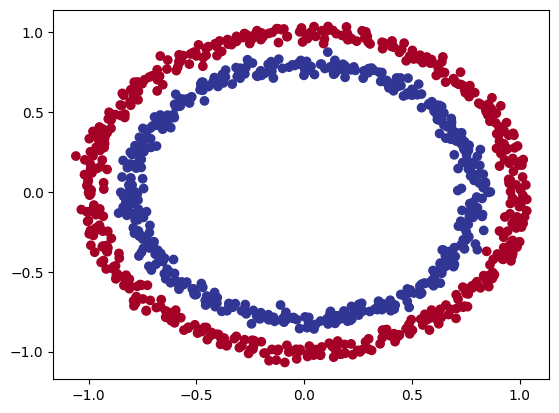

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y , cmap=plt.cm.RdYlBu)

## Input and Output Shapes







Input and output shapes
One of the most common issues you'll run into when building neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of the output data.

In our case, we want to input X and get our model to predict y.

So let's check out the shapes of X and y.

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we re working 
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:
1. Create or imoport a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate
 



In [ ]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [ ]:

# set random seed
tf.random.set_seed(42)

# 1. Create the model using Sequantial API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(), 
                metrics=["accuracy"])
 # 3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 6s 6ms/step - loss: 4.8411 - accuracy: 0.4680
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 5.8053 - accuracy: 0.5420
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 5.2358 - accuracy: 0.5510
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 5.1498 - accuracy: 0.5370
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 5.0461 - accuracy: 0.5320


In [ ]:
# Lets try and improev our model by training for longer
model_1.fit(X,y,epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Lets step things up a notch and add an extra layer

In [ ]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X,y,epochs=100, verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.6246 - accuracy: 0.5000


[7.6246185302734375, 0.5]

In [ ]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Imporving Our Model

Lets look into our bag of tricks to see how we cxan improve our model.

1. Create a model- we might wanna add more layers or incerae the number of hidden units
2. Compiling a model - here we might to choose a differen optimization function
3. Fitting a model - perhaps we might fit our mdoel for more epochs (leave it training for longer)

In [ ]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X,y,epochs=100, verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7009 - accuracy: 0.5080


[0.700877845287323, 0.5080000162124634]

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

Takes in a trained model, features (X) and labels (y).
Creates a meshgrid of the different X values.
Makes predictions across the meshgrid.
Plots the predictions as well as a line between the different zones (where each unique class falls).
If this sounds confusing, let's see it in code and then see the output.

🔑 Note: If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


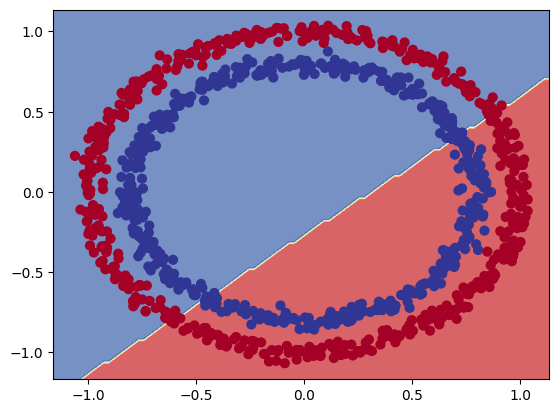

In [ ]:

# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

In [ ]:

model_3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

In [ ]:

# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 7ms/step - loss: 462.3513 - mae: 462.3513
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 359.5545 - mae: 359.5545
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 260.6816 - mae: 260.6816
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 158.1926 - mae: 158.1926
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 60.2075 - mae: 60.2075
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 72.4828 - mae: 72.4828
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 78.9435 - mae: 78.9435
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 53.5993 - mae: 53.5993
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 46.2324 - mae: 46.2324
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 50.7667 - mae: 50.7667
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 9ms/step


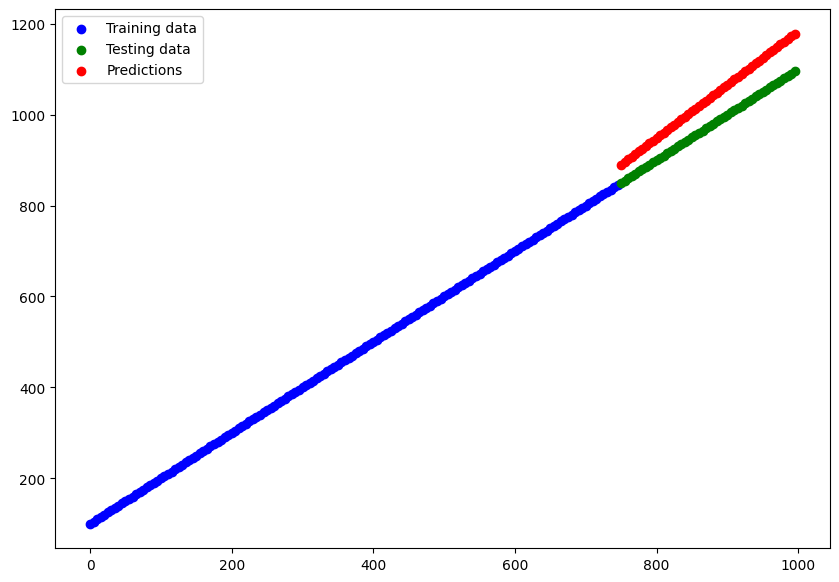

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

## The missing piece : Non-Linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)

])
# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0),
                metrics=["accuracy"])
# 3. Fit the model
history = model_4.fit(X,y,epochs=100)
  

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.3286 - accuracy: 0.4590
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2801 - accuracy: 0.4580
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2222 - accuracy: 0.4600
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1402 - accuracy: 0.4630
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0900 - accuracy: 0.4670
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0630 - accuracy: 0.4710
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0409 - accuracy: 0.4700
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0361 - accuracy: 0.4700
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0165 - accuracy: 0.4680
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 3.9957 - accuracy: 0.4650
Epoch 11/

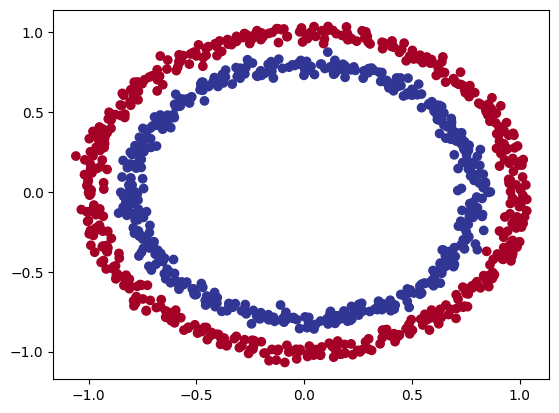

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


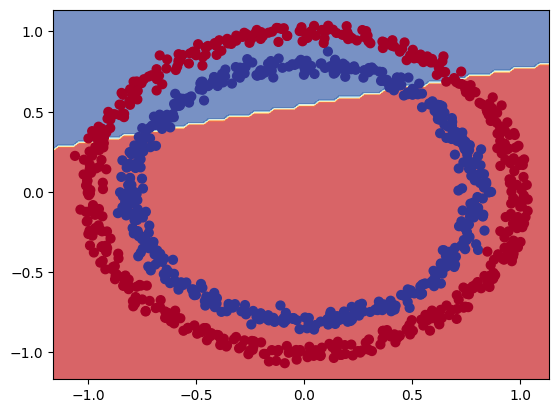

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Lets try build our first neural network with a non-linear activation function

In [ ]:
tf.random.set_seed(42)
# 1. Create a model with a non-linear function
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])
# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3. Fit the mdoel
history=model_5.fit(X,y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.0128 - accuracy: 0.4780
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0063 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0035 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0022 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9603 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9232 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9199 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9085 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8959 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.8731 - accuracy: 0.4850
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural networ from tensorflow playground
# see the set random
tf.random.set_seed(42)
#1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1,)
])
# 2. compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["accuracy"])
history = model_6.fit(X,y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X,y
                )

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


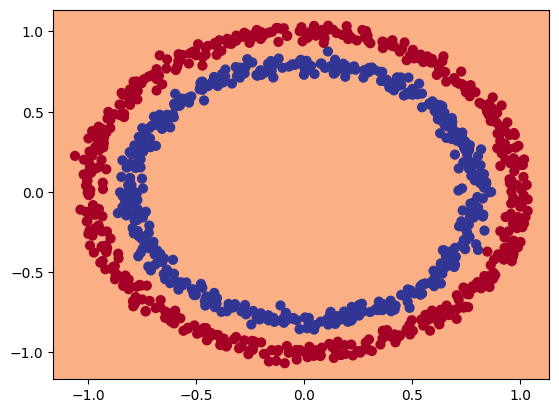

In [ ]:
# How do our model predictions look?
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [ ]:
# Set the random seed
tf.random.set_seed(42)
# 1. Createthe model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 2s 5ms/step - loss: 0.6903 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5040
Epoch 3/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6878 - accuracy: 0.5050
Epoch 4/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6870 - accuracy: 0.5100
Epoch 5/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6862 - accuracy: 0.5140
Epoch 6/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6855 - accuracy: 0.5170
Epoch 7/250
32/32 [==============================] - 0s 5ms/step - loss: 0.6846 - accuracy: 0.5590
Epoch 8/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6840 - accuracy: 0.5630
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6832 - accuracy: 0.5710
Epoch 10/250
32/32 [==============================] - 0s 4ms/step - loss: 0.6825 - accuracy: 0.5320
Epoch 11/

In [ ]:
# 4. Evaluate our model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0215 - accuracy: 0.9980


[0.021469661965966225, 0.9980000257492065]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


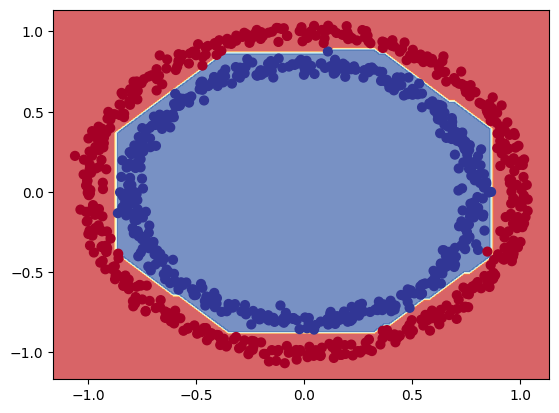

In [ ]:
# Lets visualize our metrics
plot_decision_boundary(model_7, X,y)

 ** Question : **  Whats wrong the prediction's we have made ? Are we really evaluating our mdoel correctly ? Hint: what data did the model learn on and what data did we predict on?

 ** Note:** Th combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

 Now We have discussed the concept of linear and non-linear functions(or lines) , lets see them in aciton

In [ ]:
# Create a toy a tensor(similar to the data we pass into our models):
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

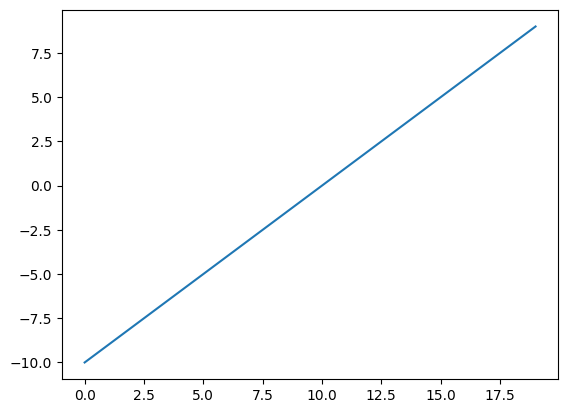

In [ ]:
plt.plot(A)

In [ ]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

  # Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

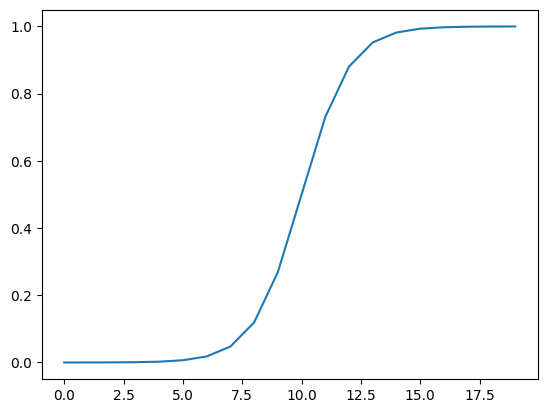

In [ ]:
# Plot our tensor transformed by  sigmoid 
plt.plot(sigmoid(A))

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# pass our tor tensoy to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [ ]:
# Lets try the linear activoaiton function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

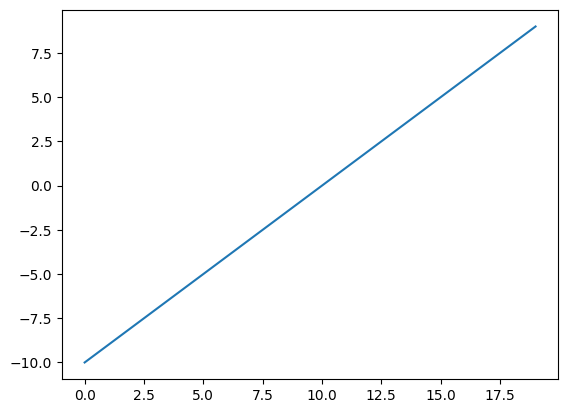

In [ ]:
# Does the linear activation functiınn change enything?
plt.plot(tf.keras.activations.linear(A))

In [ ]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

### Evaluating and Improving our classification data
So far We have been training and testing on the same dataset...
However , in machine learning this is basically a sin.
So les crete a training and test set

In [ ]:
len(X)

1000

In [ ]:
# Split into train and test set
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
# Lets recreeate a model to fit on the training data and evaluate on testing data
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3.Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 4ms/step - loss: 0.6908 - accuracy: 0.4988
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5163
Epoch 3/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6856 - accuracy: 0.5213
Epoch 4/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6826 - accuracy: 0.5562
Epoch 5/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.5788
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6659 - accuracy: 0.5562
Epoch 7/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6543 - accuracy: 0.6450
Epoch 8/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6423 - accuracy: 0.6300
Epoch 9/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6218 - accuracy: 0.6800
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5797 - accuracy: 0.7700
Epoch 11/25
25/25 [

In [ ]:
# 4.Evaluate the model on  the test set 
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3033 - accuracy: 0.9000


[0.3033072352409363, 0.8999999761581421]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


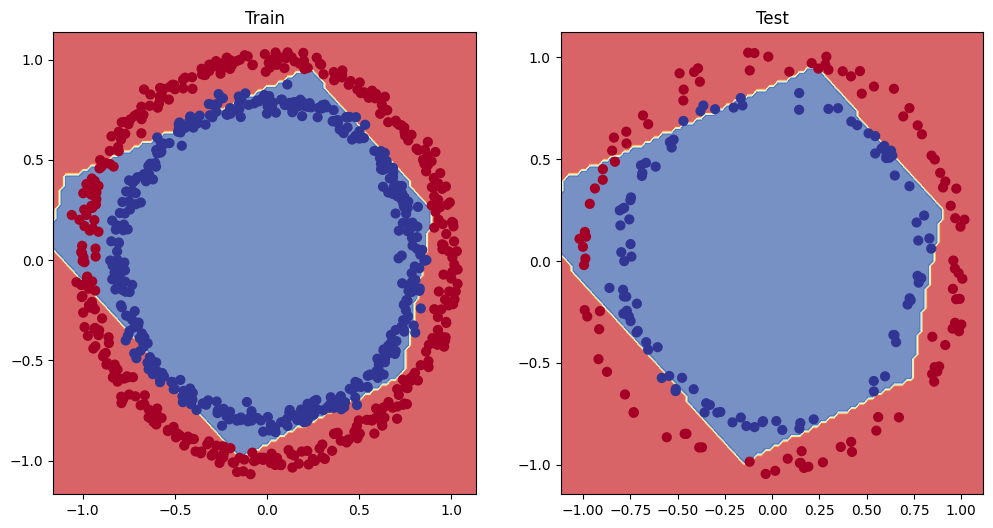

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [ ]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.690841,0.49875
1,0.688666,0.51625
2,0.685635,0.52125
3,0.682608,0.55625
4,0.675556,0.57875
5,0.665916,0.55625
6,0.654286,0.64500
7,0.642307,0.63000
8,0.621835,0.68000
9,0.579663,0.77000


Text(0.5, 1.0, 'Model_8 Loss Curves')

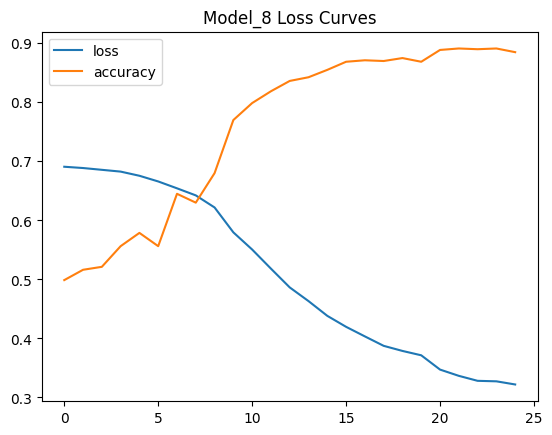

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curves")

** NOTE:**  For many problems , the loss function going down means the model is improving (the predictions it's making are getting closer to the ground teuth labels).

## Finding the best learning rate 

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going tı use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionallity , you can add to your *while* its training
* Anther model ( we could use the same one as above , but we are practicing building models here)
* A modified loss curves plot

In [ ]:
# Set random seed
tf.random.set_seed(42)
# 1. Create a odel (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# 2. Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer= "Adam",
                metrics=["accuracy"])
# Create a learnşng rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model(passing lr_scheduler callback)
history_9= model_9.fit(X_train,
                       y_train,
                       epochs=100,
                       callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 3s 3ms/step - loss: 0.6996 - accuracy: 0.5150 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6993 - accuracy: 0.5150 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6990 - accuracy: 0.5150 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6986 - accuracy: 0.5163 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6983 - accuracy: 0.5163 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6980 - accuracy: 0.5125 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6976 - accuracy: 0.5113 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6972 - accuracy: 0.5100 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

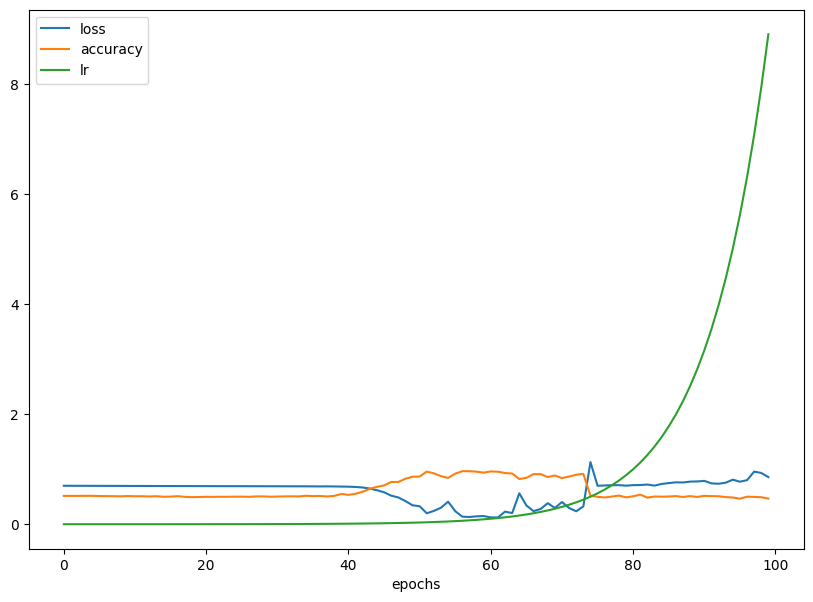

In [ ]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10,7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs. Loss')

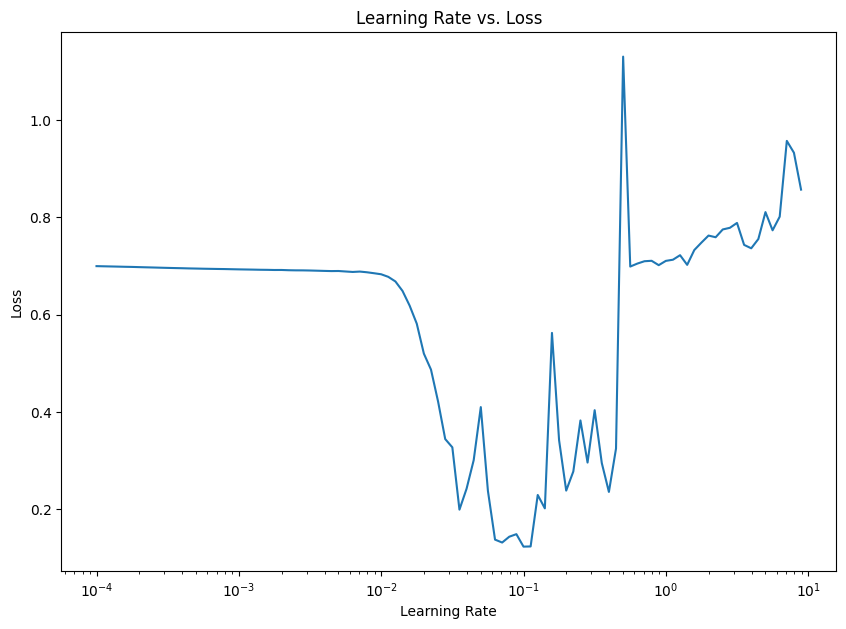

In [ ]:
# Lets plot the learning rate vs. the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs. Loss")

In [ ]:
10**-2


0.01

In [ ]:
# Example of other typical learning rates values:
10**0 , 10**-1, 10**-2, 10**-3

(1, 0.1, 0.01, 0.001)

In [ ]:
# Lets try using a higher *ideal* learning rate wşth the same model as before
#Set random seed
tf.random.set_seed(42)
# Create a model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile model
model_10.compile(loss = "binary_crossentropy",
                  optimizer= tf.keras.optimizers.Adam(learning_rate=0.022),
                  metrics=["accuracy"])
# Fit the modek for 20 epochs
history_10 = model_10.fit(X_train, y_train ,epochs=20)

Epoch 1/20
25/25 [==============================] - 2s 3ms/step - loss: 0.6838 - accuracy: 0.5612
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6717 - accuracy: 0.5775
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6530 - accuracy: 0.5913
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6410 - accuracy: 0.6225
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6146 - accuracy: 0.6700
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5636 - accuracy: 0.7688
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5011 - accuracy: 0.7862
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3990 - accuracy: 0.8425
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8850
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2604 - accuracy: 0.9563
Epoch 11/20
25/25 [

In [ ]:
# Evaluate the model_10 on the test dataset
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 1s 7ms/step - loss: 0.0830 - accuracy: 0.9800


[0.08302896469831467, 0.9800000190734863]

In [ ]:
# Evaluate model_8 on the test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.3033 - accuracy: 0.9000


[0.3033072352409363, 0.8999999761581421]

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


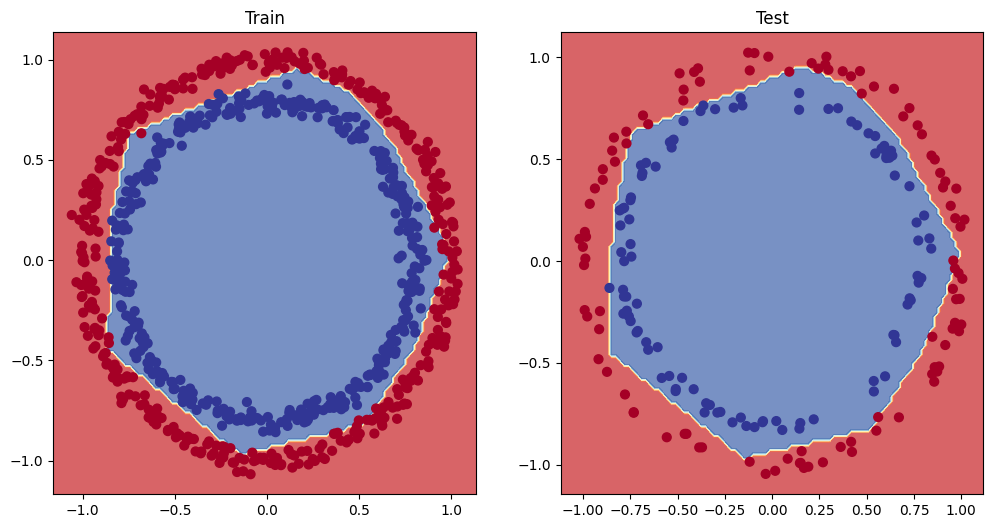

In [ ]:
# Plot the decision boundaries for the training and the test set
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train , y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)


## More classification evaluation methods

Alongside visualizing our models results as much as possible , there are a handful of other classification evaluation methods & metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score 
* Confusion matrix
* Clasification report (from sci-kit learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy  = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set:{loss}")
print(f"Model accuracy on the test set : {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0830 - accuracy: 0.9800
Model loss on the test set:0.08302896469831467
Model accuracy on the test set : 98.00%


##How about a confusion matrix?

In [ ]:
# Create a confusion matrix 
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds= model_10.predict(X_test)

# Cerate confusion matrix
confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


ValueError: ignored

In [ ]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [ ]:
y_preds[:10]

array([[9.6400261e-01],
       [9.9946910e-01],
       [9.8659712e-01],
       [9.9980766e-01],
       [3.9893353e-01],
       [8.4121886e-05],
       [9.8080516e-01],
       [3.8510848e-02],
       [9.9044842e-01],
       [1.9356307e-02]], dtype=float32)

Looks like our predictions array has come out in ** prediction probabilty ** form... the standard output from the sgimoid(or softmax) activation functions

In [ ]:
# Convert our prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create confusion matrix
confusion_matrix(y_test, tf.round(y_preds))


array([[98,  3],
       [ 1, 98]])

How about we prettify our confusion matrix??

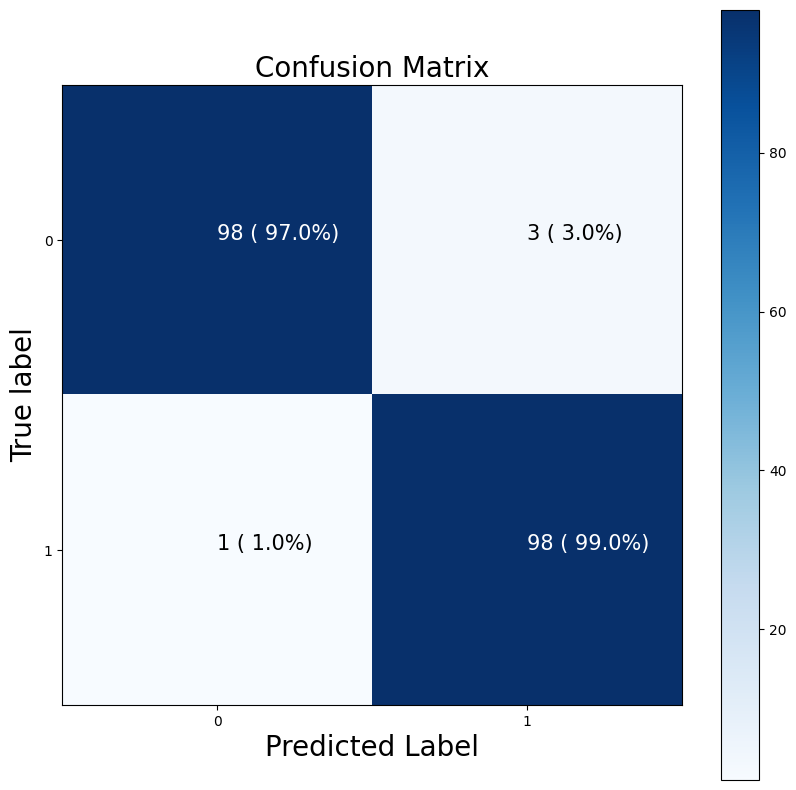

In [ ]:
# Note: the confusion matrix code we are about to write is a remix of sci-kit learns plot confusion matrix function
import itertools 
figsize=(10,10)
# Create the confusion matrix 
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm=cm.astype("float") / cm.sum(axis=1)[:,np.newaxis] # Normalize our confusion matrix
n_classes = cm.shape[0]

# Lets prettify it 
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
# Create classes 
classes = False


if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# label the axis 
ax.set(title = "Confusion Matrix",
       xlabel="Predicted Label",
       ylabel = "True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# set the x-axs labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) /2.
# Plot the text on each cell 
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f"{cm[i,j]} ( {cm_norm[i,j]*100:.1f}%)",
           color ="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (Multiclasss classification)
When you have moder than 2 calsses as an option , it is known as **multiclass classification** .
* This means if you have 3 different classes , it is multi-class classsification
* It also means if you have 100 different , it is a multi calss classificaiton

To practice multi-class classification , we are going to build a neural network to classify images of different items of clothing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has alreadt been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the sahpe of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

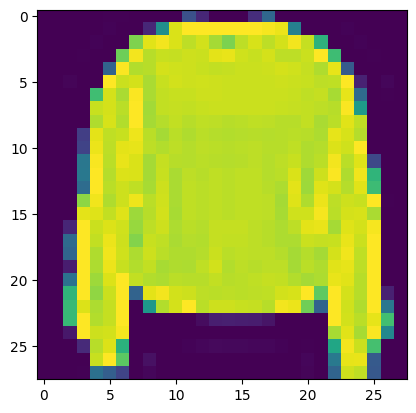

In [ ]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [ ]:
# Check out samples label
train_labels[7]

2

In [ ]:
# Create a small list so we can index onto our training labels so the humanreadable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]
len(class_names)

10

Text(0.5, 1.0, 'Trouser')

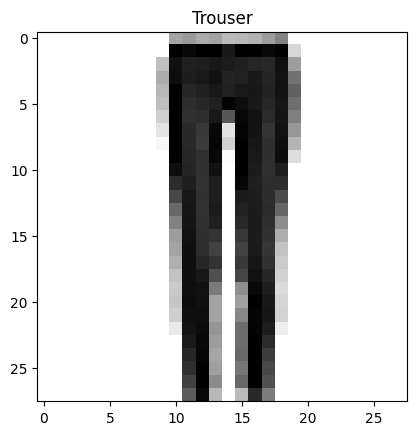

In [ ]:
# plot an example image and its label 
index_of_choice = 365
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

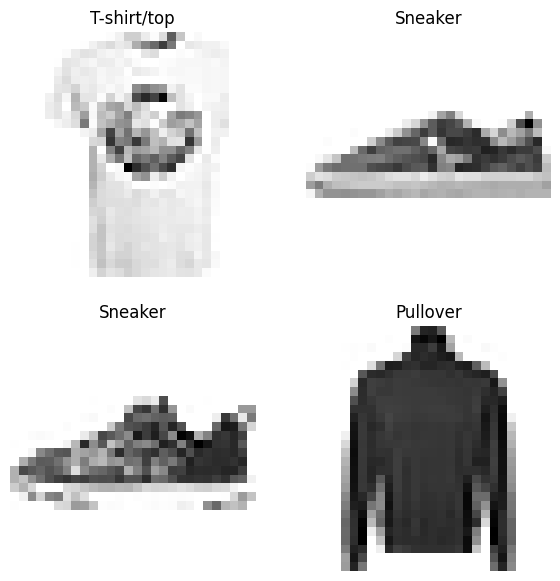

In [ ]:
# Plot multiple random images of fashion mnist
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap = plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multiclass classification model
For our mukticlass classification odel , we can use a similar architecture to our binary classifiers , however we are going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of 1 image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
  * If youre labels are one-hot encoded , use CategoricalCrossentropy()  , and   if not use SparseCAtegoricalCrossentropy()
* Output layer activation = softmax (not sigmoid)

In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
len(class_names)

10

In [ ]:
# our data needs to be flattened(from 28*28 to None,784)
flatten_model =tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
28*28


784

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model 
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3278 - accuracy: 0.0982 - val_loss: 2.3030 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
# Check the model summary 
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Check the min adn max values of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized) , this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [ ]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data /255.0
test_data_norm = test_data / 255.0
# Check the min and max values of scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# now our data is normalized. Lets build a model to find patterns in it
# set random seed
tf.random.set_seed(42)
# Create a model (same as model_11)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
    ])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2479 - accuracy: 0.5308 - val_loss: 0.9088 - val_accuracy: 0.7185
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8066 - accuracy: 0.7455 - val_loss: 0.7554 - val_accuracy: 0.7565
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6993 - accuracy: 0.7639 - val_loss: 0.6911 - val_accuracy: 0.7630
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6526 - accuracy: 0.7710 - val_loss: 0.6637 - val_accuracy: 0.7658
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6280 - accuracy: 0.7771 - val_loss: 0.6529 - val_accuracy: 0.7730
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6148 - accuracy: 0.7807 - val_loss: 0.6494 - val_accuracy: 0.7660
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6067 - accuracy: 0.7830 - val_loss: 0.6828 - val_accuracy:

**NOTE:** Neural networks tend to preer data in numerical form as well as scaled/normalized(nımbers between 0 and 1)

<Axes: title={'center': 'Normalized Data'}>

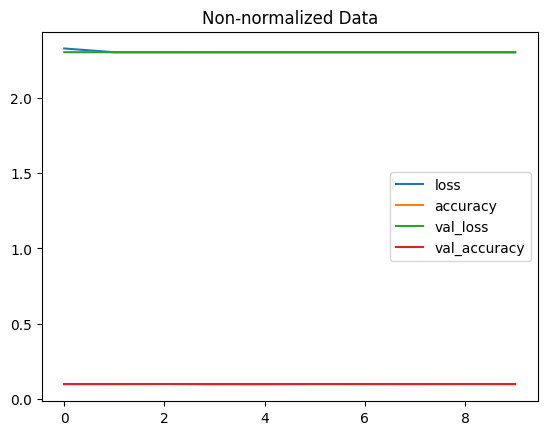

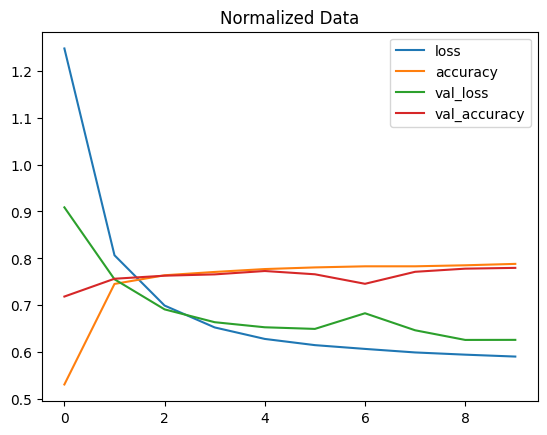

In [ ]:
import pandas as pd
# Non normalized data
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# normalized data
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

** NOTE: ** The same model with even slightly different data can produce dramatically differnet results. So when you are comparing models , it is important to make sure you are comparing them on the same criteria (e.g. same architecture but different data or same data but diferent architecture.

## Finding the ideal learning rate

In [ ]:
# sEt the random sed
tf.random.set_seed(42)
# Crete model
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data = (test_data_norm, test_labels),
                               callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6778 - accuracy: 0.3382 - val_loss: 1.3623 - val_accuracy: 0.4460 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0322 - accuracy: 0.5817 - val_loss: 0.9176 - val_accuracy: 0.6401 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8355 - accuracy: 0.6766 - val_loss: 0.8535 - val_accuracy: 0.6692 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7654 - accuracy: 0.7135 - val_loss: 0.7716 - val_accuracy: 0.7421 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7086 - accuracy: 0.7592 - val_loss: 0.7120 - val_accuracy: 0.7655 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6527 - accuracy: 0.7748 - val_loss: 0.6853 - val_accuracy: 0.7654 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 3s

Text(0.5, 1.0, 'Finding the ideal learning rate')

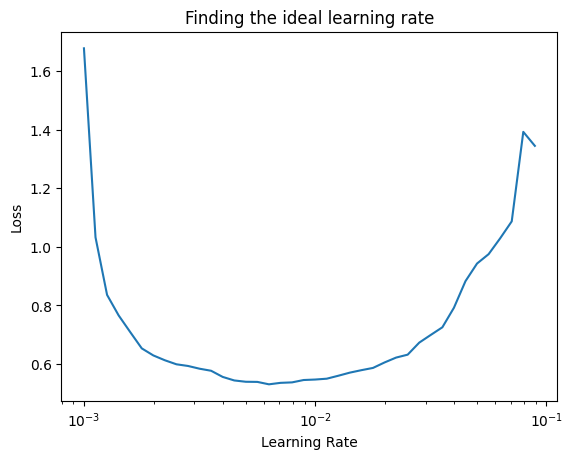

In [ ]:
# Plot the learning rat decay curve
import numpy as numpy
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
10**-3


0.001

In [ ]:
# Lets refit a model with the idel learning rate
# Set random seed
tf.random.set_seed(42)

# Create model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])
# Fit the model
history_14 = model_14.fit(train_data_norm,
                          train_labels,
                          epochs=20,
                          validation_data = (test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5150 - accuracy: 0.4539 - val_loss: 1.2071 - val_accuracy: 0.5425
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0866 - accuracy: 0.5871 - val_loss: 1.0389 - val_accuracy: 0.6070
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9843 - accuracy: 0.6281 - val_loss: 0.9523 - val_accuracy: 0.6415
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8949 - accuracy: 0.6600 - val_loss: 0.8751 - val_accuracy: 0.6661
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8380 - accuracy: 0.6777 - val_loss: 0.8406 - val_accuracy: 0.6821
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.7950 - accuracy: 0.6983 - val_loss: 0.7724 - val_accuracy: 0.7168
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7182 - accuracy: 0.7413 - val_loss: 0.7253 - val_accuracy:

## Evaluating our multiclass classification model

To evaluate our multiclass classification model we could:
* Evaluate its performance using other classification metrics (such as a confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it or longer or changing the architecture)
* Save and export it for use in an applicaiton

Let's go through the top 2

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
    


In [ ]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [ ]:
# Make some predictions with our model
y_probs = model_14.predict(test_data_norm)# probs is short for prediction probabilties

# View the first 5 predictions 
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[8.4116455e-06, 1.1812893e-15, 1.7979458e-11, 4.7848234e-06,
        3.9443854e-11, 3.6584917e-01, 5.0120942e-08, 1.5308210e-01,
        7.7580997e-05, 4.8097786e-01],
       [4.0111583e-04, 3.3263570e-15, 8.5599172e-01, 4.3777679e-09,
        7.2274529e-03, 4.4187044e-32, 1.1420735e-01, 1.2677246e-17,
        2.2172350e-02, 0.0000000e+00],
       [1.1189076e-04, 9.8093200e-01, 9.8278499e-05, 1.4730315e-02,
        3.6330570e-03, 7.0602146e-05, 4.2036540e-04, 1.3951150e-06,
        1.8611495e-06, 9.9845707e-08],
       [1.1189076e-04, 9.8093200e-01, 9.8278499e-05, 1.4730315e-02,
        3.6330570e-03, 7.0602146e-05, 4.2036540e-04, 1.3951150e-06,
        1.8611495e-06, 9.9845707e-08],
       [1.2645857e-01, 1.9766858e-05, 2.0809741e-01, 2.4758581e-02,
        3.7581500e-02, 2.6710151e-12, 5.8714408e-01, 5.4722716e-07,
        1.5939565e-02, 1.8665379e-15]], dtype=float32)

**Note:** Remember the make predictions on tthe same kind of data your model was trained on ( e.g. if your model was trained on normalizeddata, you willl want to make a predictions on normalized data


In [ ]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.4116455e-06, 1.1812893e-15, 1.7979458e-11, 4.7848234e-06,
        3.9443854e-11, 3.6584917e-01, 5.0120942e-08, 1.5308210e-01,
        7.7580997e-05, 4.8097786e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [ ]:
# Convert all of the prediction probabilites into integers 
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred=y_preds)

array([[637,   1,   5,  97,   9,   0, 238,   2,  11,   0],
       [  1, 949,   0,  31,  12,   0,   7,   0,   0,   0],
       [  9,   5, 441,  19, 274,   0, 249,   0,   3,   0],
       [ 17,  25,   3, 818,  32,   1, 100,   0,   4,   0],
       [  0,  10,  60,  23, 834,   0,  70,   0,   3,   0],
       [  0,   0,   0,   3,   0, 919,   0,  38,   8,  32],
       [123,   2, 166,  66, 193,   0, 442,   0,   8,   0],
       [  0,   0,   0,   0,   0,  53,   0, 918,   5,  24],
       [ 11,   2,  15,   7,   7,   7,  34,   3, 914,   0],
       [  0,   0,   0,   2,   0,  35,   0,  73,   1, 889]])

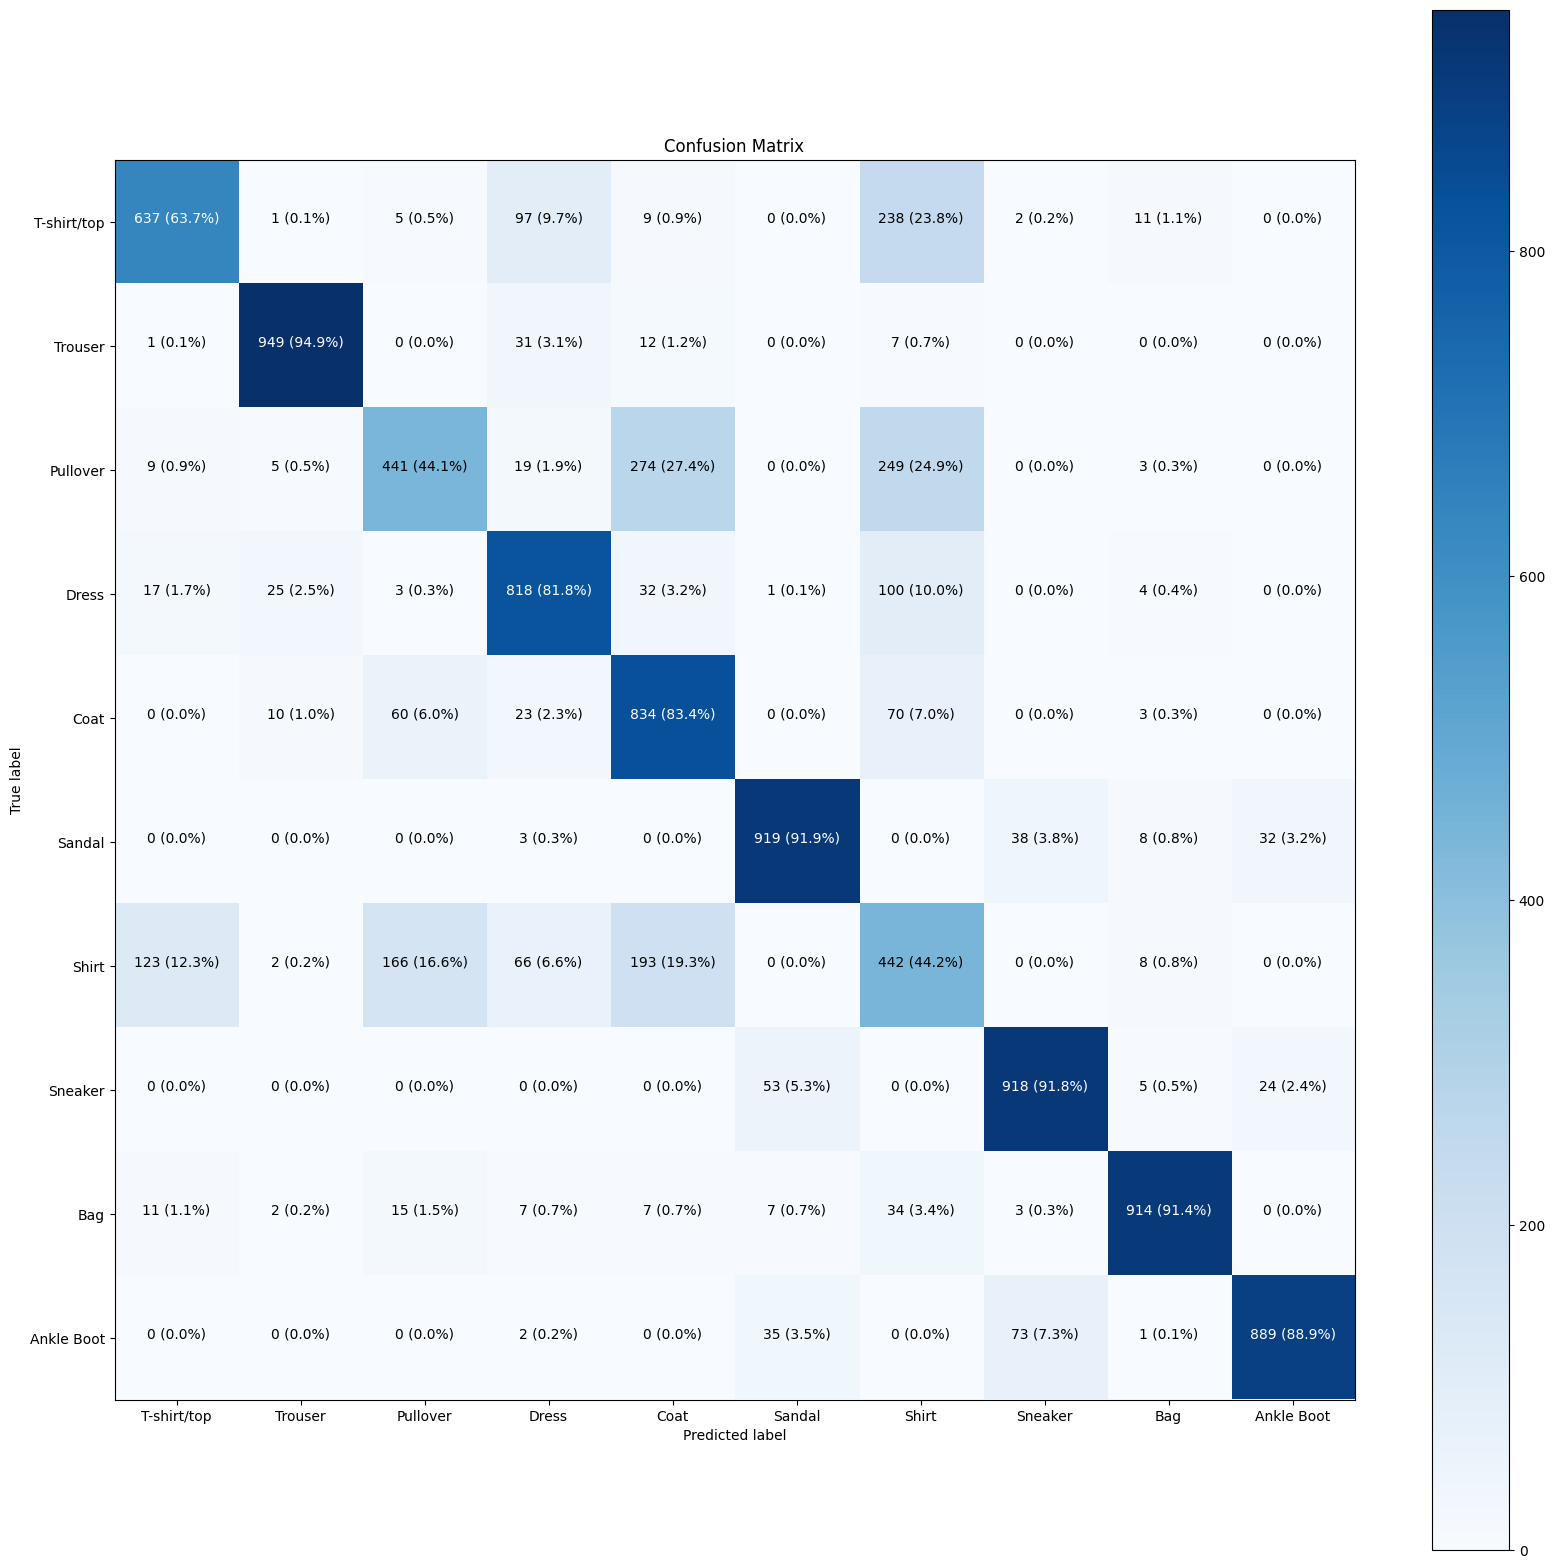

In [ ]:
# Make a prettier confusion matrix 
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(20,20),
                      text_size=10)

**Note:** Often when working with images and other forms of visual data , it is a good idea visualize as much as possible to develo a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with truth label & the predicted label

In [ ]:
import random 
def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image , plots it and labels it with a prediction and truth label
  """
  # Set up random integer
  i=random.randint(0, len(images))
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or not
  if pred_label == true_label:
    color = "green"
  else: 
    color = "red"

  # Add xlabel info (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
                                                    color=color) # set the color to green or red based on if prediction is right or wrong

1/1 [==============================] - 0s 16ms/step


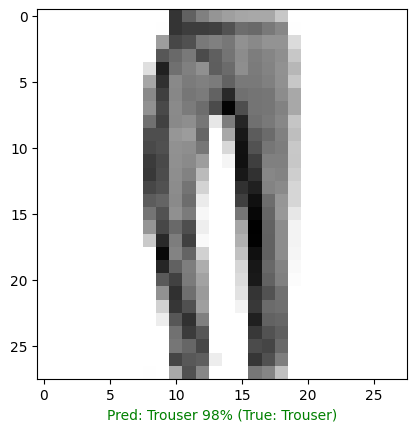

In [ ]:
# Check out  a random image as well as its prediciton
plot_random_image(model=model_14, 
                  images=test_data_norm, # always make prediction on the same kind of data your model was trained
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is our model learning?

In [ ]:
# Find the layers of our modt recent model
model_14.layers

In [ ]:
# Extract a particular layer
model_14.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()
# Shapes
weights , weights.shape

(array([[ 0.07642758, -0.12973902, -0.2451279 ,  0.04207264],
        [ 0.0793734 , -0.28166106, -0.00463448, -0.7046029 ],
        [-0.05047051, -0.5504765 , -0.27279043,  0.28133443],
        ...,
        [-0.00228605,  0.06155367, -0.28810155, -0.26395404],
        [ 0.03403596, -0.01762629, -0.6410331 , -1.2389712 ],
        [-0.04105618, -0.46049803, -0.2962962 , -0.3818868 ]],
       dtype=float32),
 (784, 4))

In [ ]:
# Now lets check out the bias vector
biases, biases.shape

(array([-0.03808779,  2.4900792 ,  2.9609902 ,  2.813878  ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paried with a weights matrix.False
The bias vector get initialized as zeros ( at least in the case of a Tensorflow Dense layer)

The bias vector dictates how much the patterns within corresponding weights matrix should influence the next layer.

In [ ]:
model_14.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


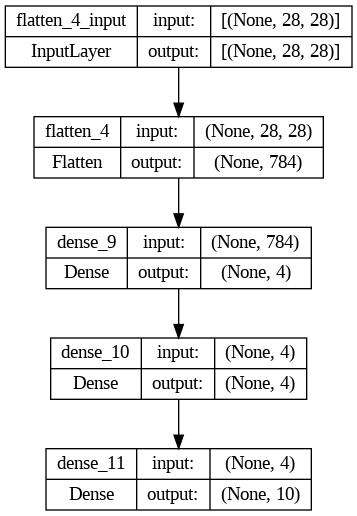

In [ ]:
# Let's check out another way of viewing our deep learning models:
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)